In [6]:
from PIL import Image, ImageDraw
import random

In [4]:
import numpy as np
import aggdraw

In [7]:
image_height = 400
image_width = 800
seed = 58

random.seed(seed)
def getRandomPoint(offset = 0):
    return (random.randrange(image_height) + offset), random.randrange(image_height)

def collapse(arr):
    return [item for t in arr for item in t]

def getRandomPoints(count, offset = 0):
    v = [getRandomPoint(offset) for _ in range(count)]
    v = collapse(v)
    return v


In [8]:
class Bezier:
    def __init__(self, P0, P1, P2, P3):
        self.P0 = np.array(P0)
        self.P1 = np.array(P1)
        self.P2 = np.array(P2)
        self.P3 = np.array(P3)

    def getPoint(self, t):
        return ((1-t)**3)*self.P0 + 3 * ((1-t)**2) * t * self.P1 + 3 * (1-t) * (t**2) * self.P2 + self.P3 * (t**3)

In [9]:
image = Image.new("RGB", (image_width, image_height), "white")
d = aggdraw.Draw(image)


In [10]:
arr_sizes = (image_width, image_height) 

def tr(args):
    return [arr_sizes[i%2] * val for (i, val) in enumerate(args)]

In [11]:
p_trace = aggdraw.Pen("blue")


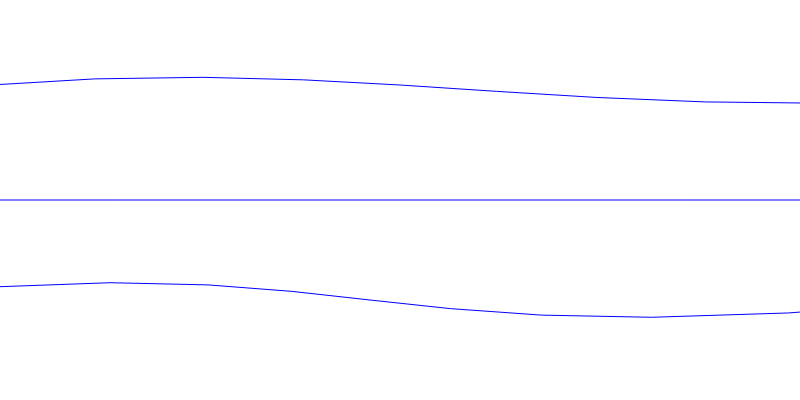

In [12]:

bezier1 = Bezier(
    [-0.2, 0.25],
    [0.4, 0.1],
    [0.6, 0.3],
    [1.2, 0.25])


bezier2 = Bezier(
    [-0.2, 0.5],
    [0.5, 0.5],
    [0.5, 0.5],
    [1.2, 0.5])


bezier3 = Bezier(
    [-0.2, 0.75],
    [0.5, 0.6],
    [0.4, 0.9],
    [1.2, 0.75])
    
last1 = bezier1.getPoint(0)
last2 = bezier2.getPoint(0)
last3 = bezier3.getPoint(0)
for i in range(1, 11):
    next1 = bezier1.getPoint(i/10)
    v = collapse([last1, next1])
    d.line(tr(v), p_trace)
    last1 = next1

    next2 = bezier2.getPoint(i/10)
    v = collapse([last2, next2])
    d.line(tr(v), p_trace)
    last2 = next2

    next3 = bezier3.getPoint(i/10)
    v = collapse([last3, next3])
    d.line(tr(v), p_trace)
    last3 = next3

d.flush()
image